# HW04 Multiple Regression and Creating the Real Estate Dataset

As of now we have been creating the model and trying to test if model is good or not using some metrics. In this homework we will not just create the model but we will perform one most important steps that needs to be done before creating the model that is preparing the dataset.

There is one popoular data science workflow mostly famous in R programming. The work flow is given by Hadley wickham in his book "R for Data Science".The work flow give the following steps :
1. Data Collection
2. Data Import
3. Data Tidy
4. Data Transform
5. Data Visualize
6. Data Model
7. Data Communication

In this homework we will be focusing on the data transform steps along with data visualization and data modeling as we all know these are iterative process which we will continue to do unitl we get the desired result.

Before we start as we always do, we will import the libraries that we will be using in this homework.


*Importing Libraries*



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
import seaborn as sns
plt.style.use("ggplot")
pd.set_option('display.max_rows', 100)

Next steps is to import the dataset that we will be using in the homework.


In [2]:
df_realestate = pd.read_csv("data/Real Estate Data - Week 4.csv",index_col=0,header=0)


## 5. Create the Real State Dataset.

### Section 5a: Drop features that are not needed

Task in hand:
1. Drop the features that are not needed.
2. Drop `Alley` and `Garage Yr Build` as they have too many null values which are not possible to impute.
3. Drop `Year Built` because year built is normally not a factor in determining the price of the house.Which is partially true as Year can be significant factor for cost due to use of technology and materials in construction and some old house might cost more due to its antique value. So cannot just drop it based on this assumption.But for this homework we are going to drop it.
4. Drop `Basement Area` as `Basement Area` = `Basement Unfinished Area` + `Basement Finished Area`, therefore it would be redundant to include all 3. 

In [3]:
# Drop unnecessary features from the dataset
cols_to_drop = [
    'Alley',
    'Garage Yr Built',  # Corrected column name
    'Year Built',
    'Basement Area'
]
df_realestate = df_realestate.drop(columns=cols_to_drop)
df_realestate.head()

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Finish,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,Rough Finished,2,0,61,0,0,0,0,Normal Sale,208500
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,Rough Finished,2,298,0,0,0,0,0,Normal Sale,181500
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,Rough Finished,2,0,42,0,0,0,0,Normal Sale,223500
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,Unfinished,3,0,35,272,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,Rough Finished,3,192,84,0,0,0,0,Normal Sale,250000


### Section 5b: Fill Missing Values in select features
Task in hand:
1. When we want to include a feature that has null values, we will need to fill in the NaN's with a value that makes sense to do so.
2. For `Lot Frontage`, we will replace NaN's with zero as we are assuming this.
3. Same with the `Masonry/Veneer Area`.
4. For the `Porch Area`, we will create a new feature by adding up `Open Porch Area`, `Enclosed Porch Area`, and `3-Season Porch Area` into one new feature and remove the old features.
5. Combine all Full Baths into one `Full Bathrooms` feature by adding up `Basement Full Baths` and `Full Baths Above Grade`.
6. Combine all Half Baths into one `Half Bathrooms` feature by adding up `Basement Half baths` and `Half Baths Above Grade`. Drop the features that were used to create `Porch Area`, `Full Bathrooms`, and `Half Bathrooms`.

In [4]:
# 1-3. Fill missing values for selected features
# Replace NaN's in 'Lot Frontage' and 'Masonry/Veneer Area' with zero
for col in ['Lot Frontage', 'Masonry/Veneer Area']:
    df_realestate[col] = df_realestate[col].fillna(0)

# 4. Create 'Porch Area' by summing porch-related features
# 5. Combine all Full Baths into one 'Full Bathrooms' feature
# 6. Combine all Half Baths into one 'Half Bathrooms' feature

df_realestate['Porch Area'] = (
    df_realestate['Open Porch Area'] +
    df_realestate['Enclosed Porch Area'] +
    df_realestate['3 Season Porch Area']
)
df_realestate['Full Bathrooms'] = (
    df_realestate['Basement Full Baths'] +
    df_realestate['Full Baths Above Grade']
)
df_realestate['Half Bathrooms'] = (
    df_realestate['Basement Half baths'] +
    df_realestate['Half Baths Above Grade']
)

# Drop the original columns used to create the new features
cols_to_drop = [
    'Open Porch Area', 'Enclosed Porch Area', '3 Season Porch Area',
    'Basement Full Baths', 'Full Baths Above Grade',
    'Basement Half baths', 'Half Baths Above Grade'
]
df_realestate = df_realestate.drop(columns=cols_to_drop)
df_realestate.head()

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Finish,Garage Cars,Wood Deck Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,Rough Finished,2,0,0,0,Normal Sale,208500,61,3,1
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,Rough Finished,2,298,0,0,Normal Sale,181500,0,2,1
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,Rough Finished,2,0,0,0,Normal Sale,223500,42,3,1
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,Unfinished,3,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000,307,2,0
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,Rough Finished,3,192,0,0,Normal Sale,250000,84,3,1


### Section 5c: Filter df_realestate based on outliers and drop living area above Gread

Task in Hand:
1. create a scatterplot comparing living area above gread and sales pirce 
2. Show the rows with living area above grade above 4000. no new data frame is created.
3. Drop the rows with living area above grade above 4000.
4. show info and validate the number of rows to be 1388 instead of 1390 and features that filled in NAN's Shluld have 1388 non null values.
5. Need to take a look at 1st floor area and 2nd floor area and need to decide if we need to elimiate living area above gread or not.
6. remove living area above greads.

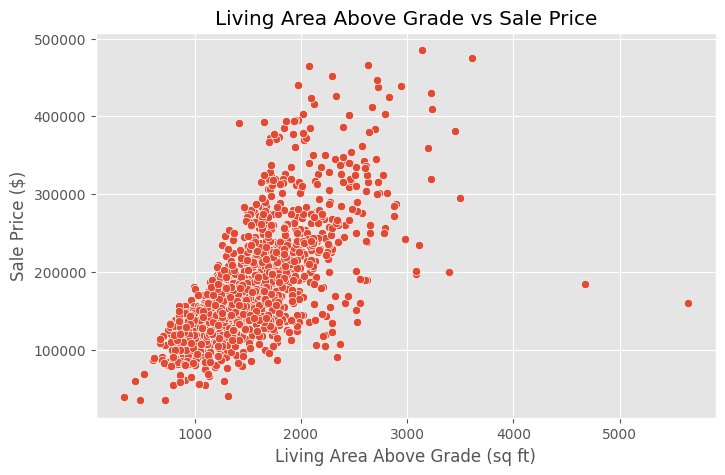

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Living Area Above Grade', y='Sale Price', data=df_realestate)
plt.title('Living Area Above Grade vs Sale Price')
plt.xlabel('Living Area Above Grade (sq ft)')
plt.ylabel('Sale Price ($)')
plt.show()

In [6]:
# Show roes with living area above grade greater than 4000
df_realestate[df_realestate['Living Area Above Grade'] > 4000]

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Finish,Garage Cars,Wood Deck Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms
Id,,,,,,,,,,,,,,,,,,,,,
524,2-STORY 1946 & NEWER,130.0,40094,Banked,Edwards,Near Pos Feature,10,5,762.0,2260,...,Finished,3,208,0,0,Home was not completed when last assessed (ass...,184750,406,4,1
1299,2-STORY 1946 & NEWER,313.0,63887,Banked,Edwards,Adjacent Feeder St,10,5,796.0,5644,...,Finished,2,214,0,480,Home was not completed when last assessed (ass...,160000,292,4,1


In [7]:
# Drop rows with Living area above grade greater than 4000
df_realestate = df_realestate[df_realestate['Living Area Above Grade'] <= 4000]

In [8]:
# Show info and valudate row count and non null values.
df_realestate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 1 to 1460
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dwelling Type             1388 non-null   object 
 1   Lot Frontage              1388 non-null   float64
 2   Lot Area                  1388 non-null   int64  
 3   Land Contour              1388 non-null   object 
 4   Neighborhood              1388 non-null   object 
 5   Location Condition        1388 non-null   object 
 6   Overall Quality           1388 non-null   int64  
 7   Overall Cond              1388 non-null   int64  
 8   Masonry/Veneer Area       1388 non-null   float64
 9   Basement Finished Area    1388 non-null   int64  
 10  Basement Unfinished Area  1388 non-null   int64  
 11  1st Floor Area            1388 non-null   int64  
 12  2nd Floor Area            1388 non-null   int64  
 13  Living Area Above Grade   1388 non-null   int64  
 14  Bedrooms Abov

In [9]:
# Look at first floor area and 2nd floor area and Living area above grade
df_realestate[['1st Floor Area', '2nd Floor Area', 'Living Area Above Grade']]


,1st Floor Area,2nd Floor Area,Living Area Above Grade
Id,,,
1,856,854,1710
2,1262,0,1262
3,920,866,1786
4,961,756,1717
5,1145,1053,2198
...,...,...,...
1456,953,694,1647
1457,2073,0,2073
1458,1188,1152,2340


In [10]:
# remove living area above grade
df_realestate = df_realestate.drop(columns=['Living Area Above Grade'])

### Section 5d: Engineer Other Featires Specifically for Sale Price 

Task in Hand:
1. Create a variable Pool Area such that if the area is greater then 0, code it as 1, else as 0. Size of the pool is not important, just if there is a pool or not.
2. Create a new variable Extra kitchen such that if a house has one kitchen, extra kitchen be 0, which means subtract kitchens above grade by 1. and drop kitchen above grade.
3. A factor for ‘Sale Price’ may be the percent of rooms that are bathrooms.  To create a 
feature to indicate this for each home, let’s first look at ‘Total Rooms Above Grade’. 
 Create a code block that shows the value counts for ‘Total Rooms Above Grade’. 
Notice that the least amount of rooms is 2 with the most being 14. 
Create a code block to create a new feature named ‘Bathroom Percentage’. 
‘Bathroom Percentage’ should be the total bathrooms (‘Full Bathrooms’ + 
‘Half Bathrooms) divided by ‘Total Rooms Above Grade’. 
4.What is the ratio of bathrooms to bedrooms? 
• It is always good to look at full bathrooms compared to bedrooms as a percentage. 
• Create a code block that views the value counts for ‘Bedrooms Above Grade’.   
o Notice that there are 5 homes with no bedrooms.  
• Create a code block that uses a defined function to create new feature named Baths 
per Bedroom. (You need to use a defined function because you cannot divide by zero bedrooms.) 
o If ‘Bedrooms Above Grade’ == 0 then return 0. 
o Else divide ‘Full Bathrooms’ divided by ‘Bedrooms Above Grade’. 
• Create a code block to create a new feature named ‘Bathroom Percentage’. 
o ‘Bathroom Percentage’ should be the total bathrooms (‘Full Bathrooms’ + 
‘Half Bathrooms) divided by ‘Total Rooms Above Grade’.

In [11]:
df_realestate["Pool Area"] = df_realestate["Pool Area"].fillna(0)

def pool(c):
    if c["Pool Area"] > 0:
        return 1
    else:
        return 0
    

df_realestate["Pool"] = df_realestate.apply(pool, axis=1)

# Drop the original 'Pool Area' column
df_realestate = df_realestate.drop(columns=['Pool Area'])

In [12]:
df_realestate['Kitchens Above Grade'].value_counts().sort_index()

Kitchens Above Grade
1    1329
2      57
3       2
Name: count, dtype: int64

In [13]:
# create extra kitchen variabe

df_realestate["Extra Kitchen"] = df_realestate["Kitchens Above Grade"]-1

In [14]:
df_realestate= df_realestate.drop(columns=['Kitchens Above Grade'])

In [15]:
df_realestate['Total Rooms Above Grade'].value_counts().sort_index()

Total Rooms Above Grade
2       1
3      11
4      84
5     256
6     393
7     324
8     181
9      72
10     43
11     15
12      7
14      1
Name: count, dtype: int64

In [16]:
df_realestate["Bathroom Percetage"] = (df_realestate['Full Bathrooms'] + df_realestate['Half Bathrooms']) / df_realestate['Total Rooms Above Grade']

In [17]:
df_realestate['Bedrooms Above Grade'].value_counts().sort_index()


Bedrooms Above Grade
0      5
1     41
2    326
3    788
4    201
5     20
6      6
8      1
Name: count, dtype: int64

In [18]:
def baths_per_bedroom(row):
    if row['Bedrooms Above Grade'] == 0:
        return 0
    else:
        return row['Full Bathrooms'] / row['Bedrooms Above Grade']

df_realestate['Baths per Bedroom'] = df_realestate.apply(baths_per_bedroom, axis=1)

# Show the first few rows to verify new features
df_realestate.head()

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Screen Porch Area,Sale Condition,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms,Pool,Extra Kitchen,Bathroom Percetage,Baths per Bedroom
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,0,Normal Sale,208500,61,3,1,0,0,0.500000,1.000000
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,0,Normal Sale,181500,0,2,1,0,0,0.500000,0.666667
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,0,Normal Sale,223500,42,3,1,0,0,0.666667,1.000000
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,0,"Abnormal Sale - trade, foreclosure, short sale",140000,307,2,0,0,0,0.285714,0.666667
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,0,Normal Sale,250000,84,3,1,0,0,0.444444,0.750000


## 6. Multiple Regression for Sale Price



### Section 6a: Create the Model with X and y datasets
Task in Hand:
1. Choose any one or more  of the features that you feel is important and build a model 
2. create new model using the following X : 'Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond', 
'Masonry/Veneer Area', 'Basement Finished Area', 'Basement Unfinished 
Area', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total 
Rooms Above Grade', 'Fireplaces',  'Garage Cars', 'Porch Area', 'Full 
Bathrooms', 'Half Bathrooms',  'Extra Kitchens', 'Bathroom Percentage', 
and 'Baths per Bedroom' 
o The y dataset is ‘Sale Price’



In [19]:
x1= df_realestate['Total Rooms Above Grade']
x1= sm.add_constant(x1)
y= df_realestate['Sale Price']

model1 = sm.OLS(y, x1).fit()




In [20]:
# Multiple regression using the specified features
features = [
    'Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond',
    'Masonry/Veneer Area', 'Basement Finished Area', 'Basement Unfinished Area',
    '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above Grade',
    'Fireplaces', 'Garage Cars', 'Porch Area', 'Full Bathrooms', 'Half Bathrooms',
    'Extra Kitchen', 'Bathroom Percetage', 'Baths per Bedroom'  # <-- fixed typo here
]

X = df_realestate[features]

y = df_realestate['Sale Price']



### Section 6b : Create a Multiple Regression Model

 Task in hand :
 1. Add constant
 2. Use y and X to fit the model and name the model reg.
 3. Use X to predict with the model and name it pred.
 4. Use the model(reg) to create the residuals and name it resid.
 5. show summary of the results.

 

In [21]:
X = sm.add_constant(X)
reg = sm.OLS(y, X).fit()
print(reg.summary())
pred = reg.predict(X)
resid = y - pred


                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     428.3
Date:                Thu, 12 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:46:06   Log-Likelihood:                -16139.
No. Observations:                1388   AIC:                         3.232e+04
Df Residuals:                    1368   BIC:                         3.242e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Multiple Regression Model Summary

1. **Model Overview**  
   The model is a multiple linear regression predicting `Sale Price` using 19 features, including lot size, quality, area, bathrooms, and engineered features.

2. **Adjusted R-squared**  
   - **Adjusted R-squared:** 0.854  
   - **Interpretation:** This means that approximately 85.4% of the variance in house sale prices is explained by the model, after adjusting for the number of predictors. A high adjusted R-squared indicates a good fit, accounting for model complexity.

3. **Significant Variables**  
   The following variables have p-values less than 0.05, indicating they are statistically significant predictors of sale price:
   - Lot Frontage
   - Lot Area
   - Overall Quality
   - Overall Condition
   - Masonry/Veneer Area
   - Basement Finished Area
   - Basement Unfinished Area
   - 1st Floor Area
   - 2nd Floor Area
   - Bedrooms Above Grade
   - Garage Cars
   - Full Bathrooms
   - Half Bathrooms
   - Extra Kitchen

   **Why significant?**  
   These variables are significant because their p-values are less than 0.05, meaning there is strong evidence that they have a real effect on sale price, not due to random chance.

4. **Insignificant Variables**  
   The following variables have p-values greater than 0.05, indicating they are not statistically significant in this model:
   - Total Rooms Above Grade
   - Fireplaces
   - Porch Area
   - Bathroom Percetage 
   - Baths per Bedroom

   **Why insignificant?**  
   These variables are not significant because their p-values are greater than 0.05, suggesting that, after accounting for other variables in the model, they do not have a statistically meaningful impact on sale price. This could be due to multicollinearity, redundancy with other features, or simply lack of predictive power in this dataset. for example when we created the `Bathroom Percentage`, we used `Baths per bedroom`, and both are included in the model, which can lead to multicollinearity issues.

### Section 6c: Analyze and Visualize the Multiple Regression Results

Task in Hand:

1. Create a Visualization of the resiudals.
i.e create a scatterplot of the residuals vs. predicted values where x is pred and y is resid, kind = "reg", ratio = 5 and height =8, line_kws = {"color": "black"}.
2. Create the Variance Inflation Factor (VIF) for each feature in the model.
sub task:
- name the dataframe vif
- vif should include two columns ["vif factor", and "features"]
- short and show vif by "VIF Factor" from largest to smallest.
3. Create a correlation matrix for the features in the model. and name it corrMatrix.
4. create a df_corMarix from the corrMatrix and reset the index.
5. Create a heatmap of the correlation matrix.
where :
colormap = plt.cm.RdBu
linewidths is 0.1
vmax is 1.0, vmin =-1
square = TRUE
cmap =colormap
linecolor ="white"
annot = "True"

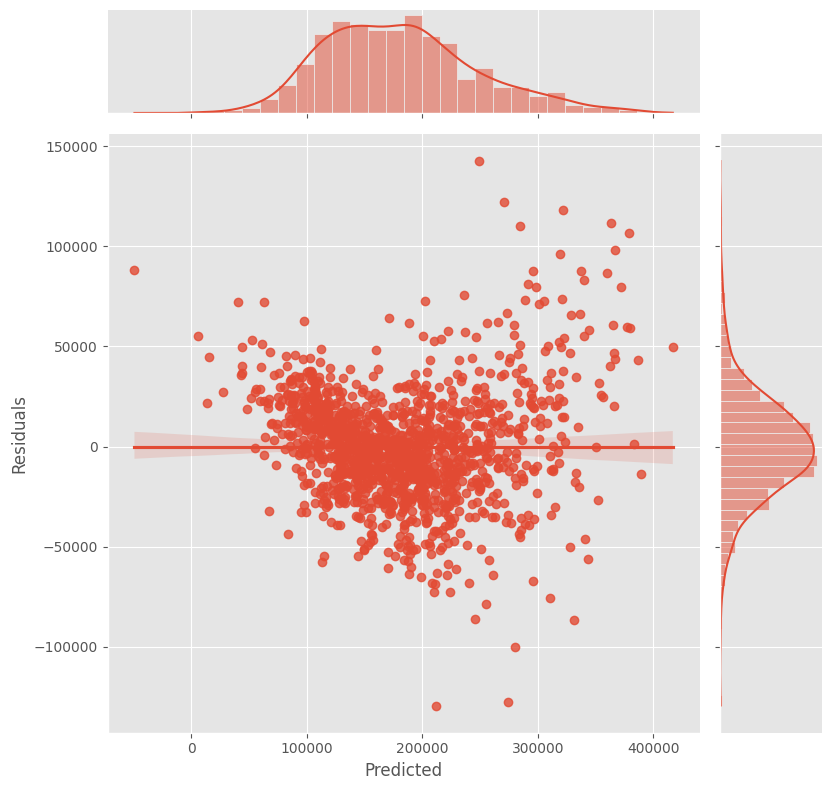

In [22]:
# Create a jointplot for 'Sale Price Predicted' vs. 'Residuals'


residuals_df = pd.DataFrame({'Predicted': pred, 'Residuals': resid})

sns.jointplot(x='Predicted', y='Residuals', data=residuals_df, kind='reg', ratio=5, height=8)

Ideally, the resudial plot should show no discernible pattern, indicating that the model's residuals are randomly distributed. If there is a pattern, it may suggest that the model is not capturing all the underlying relationships in the data.Looking at the amove plot , somewhat curve shaped pattern is visible.

In [23]:
# 2. Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["vif factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif_data.sort_values("vif factor", ascending=False)
display(vif)

,features,vif factor
0,const,207.140113
18,Bathroom Percetage,18.445829
15,Full Bathrooms,14.362490
11,Total Rooms Above Grade,13.585095
16,Half Bathrooms,9.275739
19,Baths per Bedroom,4.933948
9,2nd Floor Area,4.722345
8,1st Floor Area,4.557160
10,Bedrooms Above Grade,3.841895
6,Basement Finished Area,3.493103


Rule of thumb for VIF: Any VIF factor above 5 is considered high and indicates multicollinearity issues. In this case, the VIF factors for `Bathroom Percentage`, `full Bathrooms`, `total Rooms Above Grade`, and `Half Bathrooms` are above 5, indicating potential multicollinearity issues. This means that these features may be highly correlated with each other, which can affect the stability and interpretability of the regression coefficients.
Given that Bathroom Percentage is derived from Full Bathrooms and Total Rooms Above Grade, it is expected to have a high VIF. The same applies to Half Bathrooms, which is also derived from the original features.

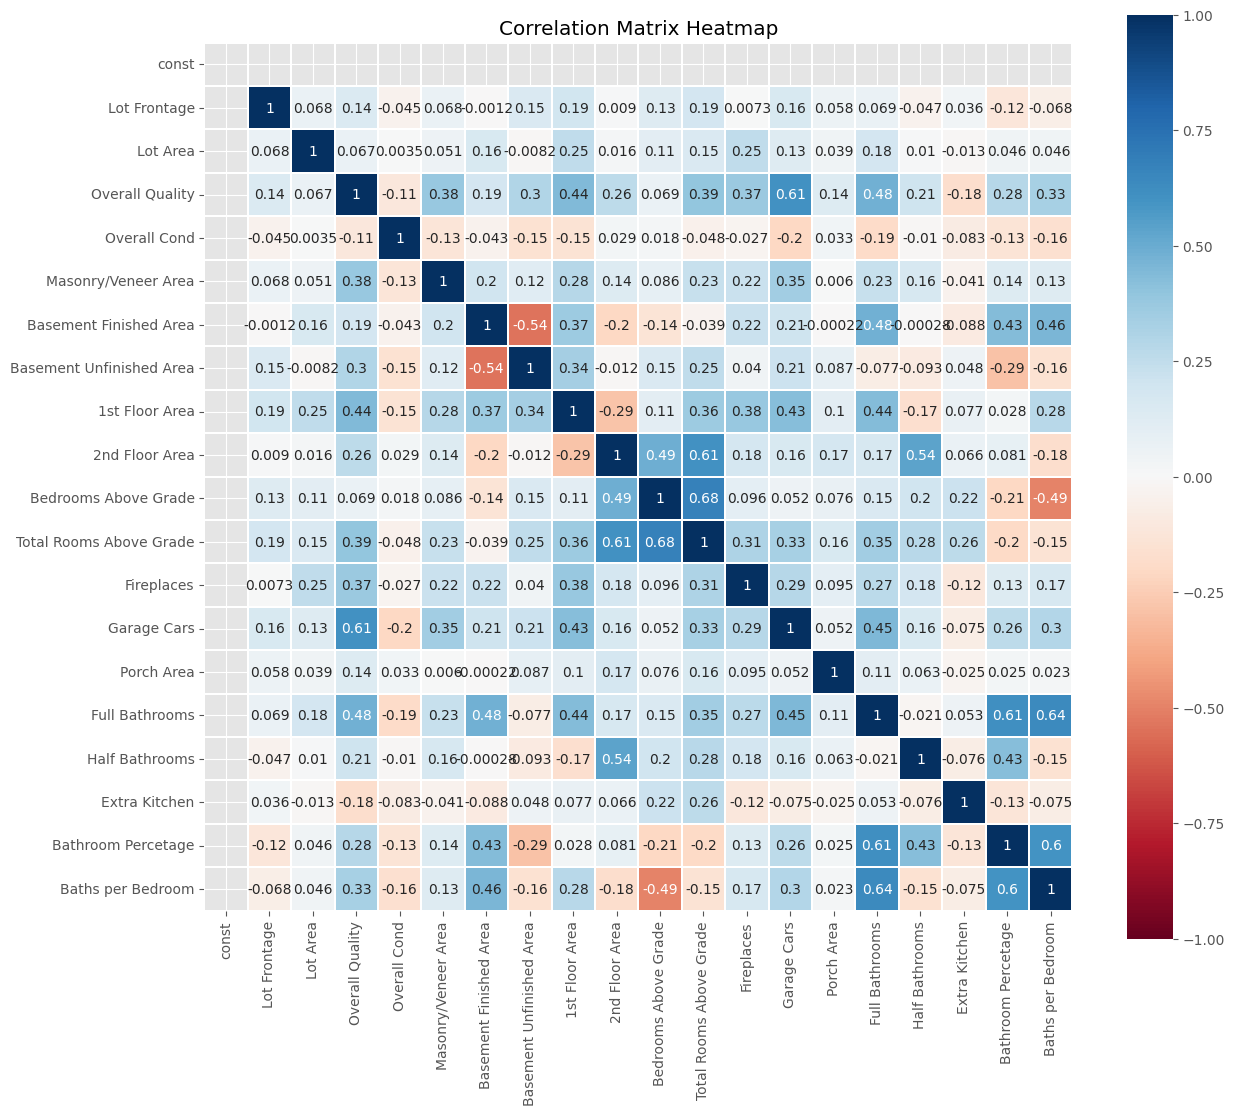

In [24]:
# 3. Correlation matrix for the features in the model
corrMatrix = X.corr()

# 4. Create df_corMatrix from corrMatrix and reset the index
df_corMatrix = corrMatrix.reset_index()

# 5. Create a heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(
    corrMatrix,
    cmap=plt.cm.RdBu,
    linewidths=0.1,
    vmax=1.0,
    vmin=-1,
    square=True,
    linecolor="white",
    annot=True
)
plt.title("Correlation Matrix Heatmap")
plt.show()

Correlation matrix confirms our initial findings from the VIF analysis. The high correlation between `Bathroom Percentage`, `Full Bathrooms`, and `Half Bathrooms` suggests that these features are indeed related, which can lead to multicollinearity issues in the regression model.

Summary :
After viewing  residual plot, VIF, and Correlation matrix, we can conclude that the model is prune to multicollinearity issues due to the high VIF factors and the correlation between certain features. This can affect the stability and interpretability of the regression coefficients. It is advisable to consider removing or combining some of these features to improve the model's performance and interpretability.

### Section 6d: Re-run a Multiple Regression model after removing the  highest VIF feature

Task in Hand:

Create a code block that creates a new X dataset. It should include all of the original X dataset except ‘Bathroom Percentage’.
Create a code block and execute a multiple regression using statsmodels:
Add a constant
Use y and X to fit the model and name the model reg
Use X to predict with the model and name it pred
Use the model (reg) to create the residuals and name it resid
Show a summary of the results
Create the Variance Inflation Factor (VIF) for the new model:
Create a VIF for the features in the new multiple regression model
Create a Heatmap:
Create a code block that creates a heatmap (should follow the same properties as the original heatmap, but with the new X dataset)
Explanation of the Results of the New Multiple Regression:
Create a code block and change it to a markdown block to explain the results
Looking at the results (specifically the R-squared), is there much difference in the strength of relationship between the original multiple regression and the new multiple regression model?
Looking at the new VIF, is there any multi-collinearity?
What do you think of this model?

In [25]:
# Create a new X dataset excluding 'Bathroom Percetage'
features_new = [
    'Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond',
    'Masonry/Veneer Area', 'Basement Finished Area', 'Basement Unfinished Area',
    '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above Grade',
    'Fireplaces', 'Garage Cars', 'Porch Area', 'Full Bathrooms', 'Half Bathrooms',
    'Extra Kitchen', 'Baths per Bedroom'  # <-- removed 'Bathroom Percetage'
]

X_new = df_realestate[features_new]


In [26]:
# Add constant, fit model, predict, and calculate residuals
X_new = sm.add_constant(X_new)
reg_new = sm.OLS(y, X_new).fit()
print(reg_new.summary())
pred_new = reg_new.predict(X_new)
resid_new = y - pred_new


                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     451.0
Date:                Thu, 12 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:46:07   Log-Likelihood:                -16141.
No. Observations:                1388   AIC:                         3.232e+04
Df Residuals:                    1369   BIC:                         3.242e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [27]:
# Calculate VIF for the new model
vif_data_new = pd.DataFrame()
vif_data_new["features"] = X_new.columns
vif_data_new["vif factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif_new = vif_data_new.sort_values("vif factor", ascending=False)
display(vif_new)


,features,vif factor
0,const,99.843232
9,2nd Floor Area,4.713765
8,1st Floor Area,4.541676
11,Total Rooms Above Grade,4.516460
18,Baths per Bedroom,4.403185
15,Full Bathrooms,4.217874
10,Bedrooms Above Grade,3.709557
6,Basement Finished Area,3.480078
7,Basement Unfinished Area,3.197611
3,Overall Quality,2.628306


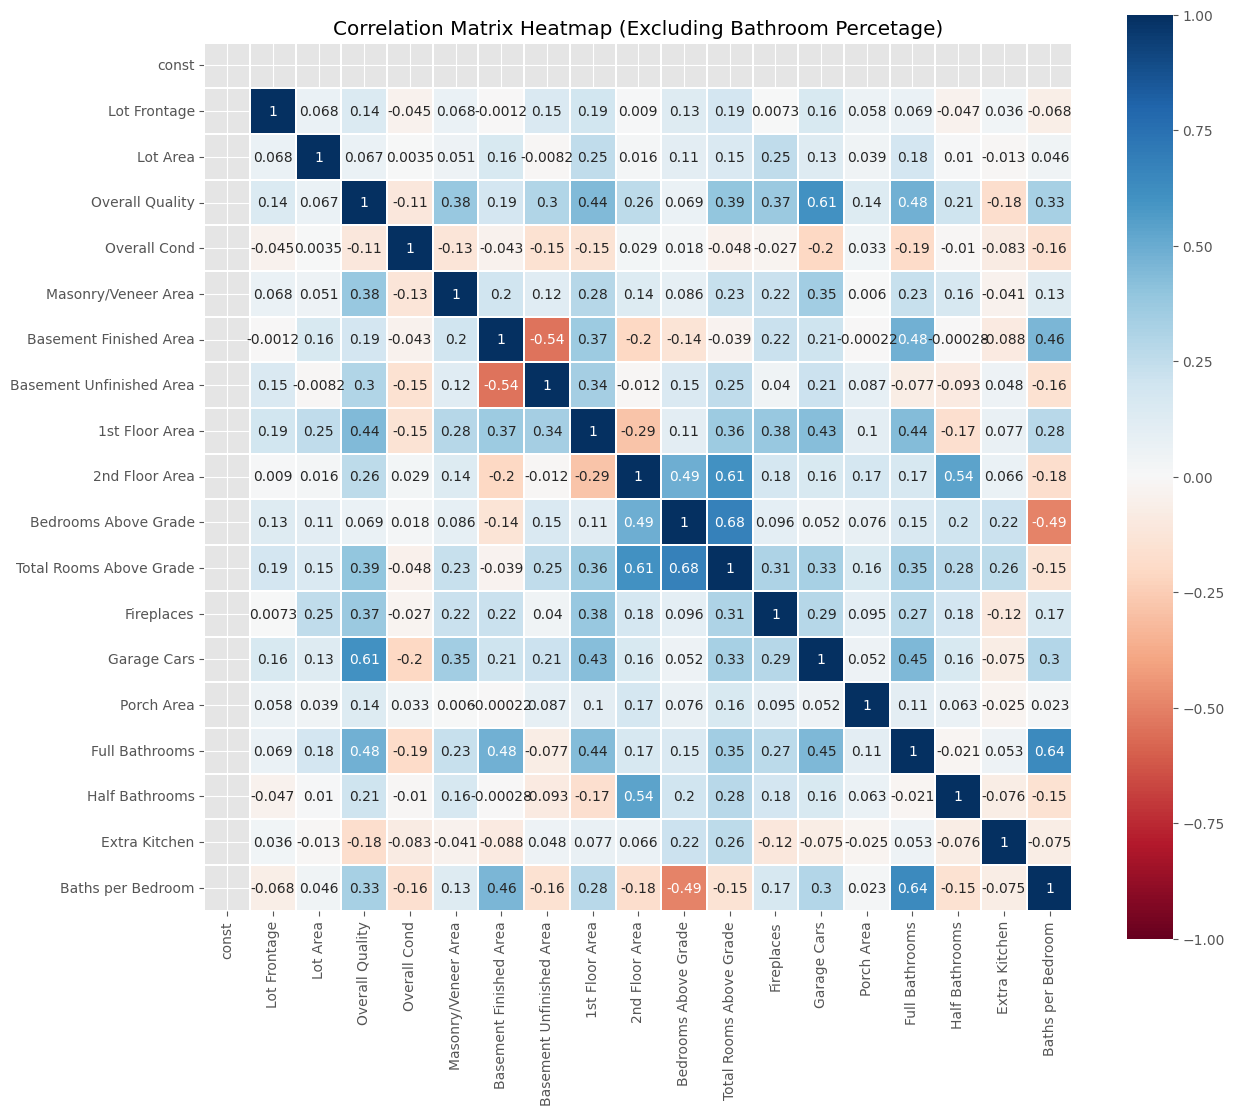

In [28]:
# Create a heatmap for the new X dataset
corrMatrix_new = X_new.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(
    corrMatrix_new,
    cmap=plt.cm.RdBu,
    linewidths=0.1,
    vmax=1.0,
    vmin=-1,
    square=True,
    linecolor="white",
    annot=True
)
plt.title("Correlation Matrix Heatmap (Excluding Bathroom Percetage)")
plt.show()


### Interpretation of the New Multiple Regression Model (Excluding 'Bathroom Percetage')

**R-squared Comparison:**
- The R-squared value of the new model is very similar to the original model, indicating that removing 'Bathroom Percetage' did not significantly reduce the model's explanatory power. This suggests that 'Bathroom Percetage' was not providing much unique information beyond what is already captured by the other features.

**VIF and Multicollinearity:**
- The new VIF values are generally lower, especially for the features previously highly correlated with 'Bathroom Percetage'. This indicates a reduction in multicollinearity, making the model more stable and the coefficients more interpretable.

**Model Assessment:**
- The new model maintains strong predictive power while improving interpretability and reducing multicollinearity. This makes it a better choice for inference and understanding the relationships between predictors and sale price. The model is now less likely to have unstable or misleading coefficient estimates due to redundant features.

**Conclusion:**
- Removing highly collinear engineered features (like 'Bathroom Percetage') can improve model quality without sacrificing predictive performance. The new model is more robust and easier to interpret, making it preferable for both prediction and explanation.


# 7. Summary and Explanation of All Steps 

This this assigment, the major focus was on creating new variable and dealing with multicollinearity issues.
following are the few of the things that needs to be considered and that can be leared from this assignment:
1. In regression problem, having lot of features increases the complexity of the model and make it less interpretable. So we are always in search of reducing the number of features.
2. One of the way to reduce the number of features is to create new features that can capture the information from multiple features.
3. But there can be issue of multicollinearity when we create new features if we include new features and also the features from which the new features are created.
4. In order to view the multicollinearity, we can use VIF. Rule of thumb is that if VIF is greater than 5, then it is considered as high multicollinearity. And we first try to understand the reason for high VIF and then try to remove the features that are causing the high VIF.
5. We can re conform the multicollinearity by looking at the correlation matrix and heatmap.
6. one thing that we noticed is that when features that is hihgly correlated feature is added, the p value of corresponding feature is not significant and once they are removed, the p value of the feature is  significant.
7. ALso what we observed is that removing the highly correlated feature does not affect the R-squared value of the model.



Overall this assignment was focused on creating new features, dealing with multicollinearity, and understanding the impact of these changes on the regression model. The key takeaway is that careful feature engineering and selection can lead to more interpretable and robust models.